In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\Data science\Dataset\EDA on netflix data\netflix_titles.csv")


In [17]:
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:

df.shape



(8807, 12)

In [19]:

df.columns



Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Missing Values Analysis

In [21]:
df.isnull().sum().sort_values(ascending=False)


director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

Handle Missing Values

In [24]:
df.fillna({'director':'Unknown'}, inplace=True)
df.fillna({'cast':'Unknown'}, inplace=True)
df.fillna({'country':'Unknown'}, inplace=True)
df.fillna({'rating':'Unknown'}, inplace=True)


Date Handling

In [25]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


Clean Duration Column

In [26]:
df['duration_value'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('(min|Season)')


Split Multi-Valued Columns

In [28]:
df_country = df.assign(country=df['country'].str.split(', ')).explode('country')


In [29]:
df_genre = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')


UNIVARIATE ANALYSIS

MOVIES VS TV Shows

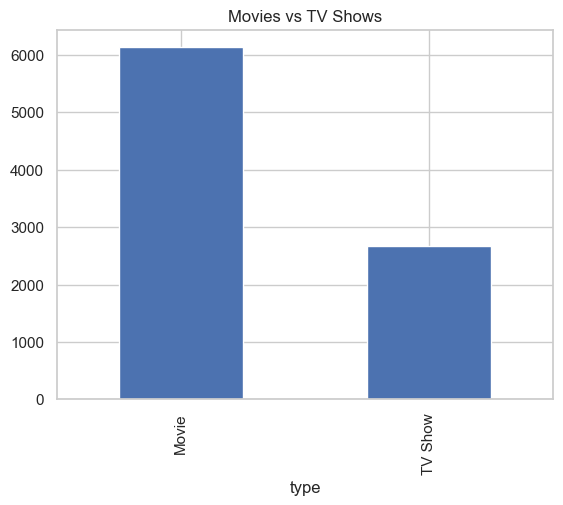

In [30]:
df['type'].value_counts().plot(kind='bar')
plt.title("Movies vs TV Shows")
plt.show()


RATING DISTRIBUTION

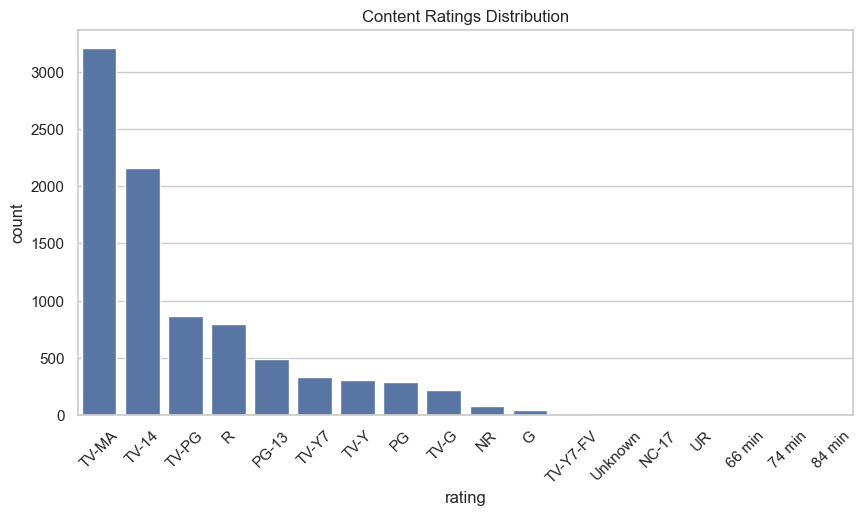

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Content Ratings Distribution")
plt.show()


CONTENT ADDED OVER YEARS

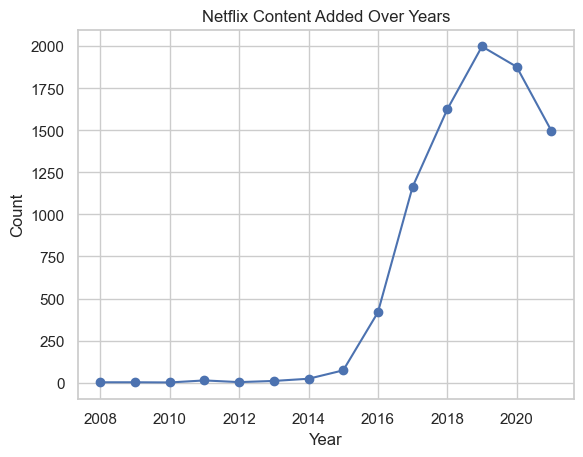

In [32]:
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Netflix Content Added Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


Bivariate Analysis (Two Variables)

MOVIES VS TV SHOWS

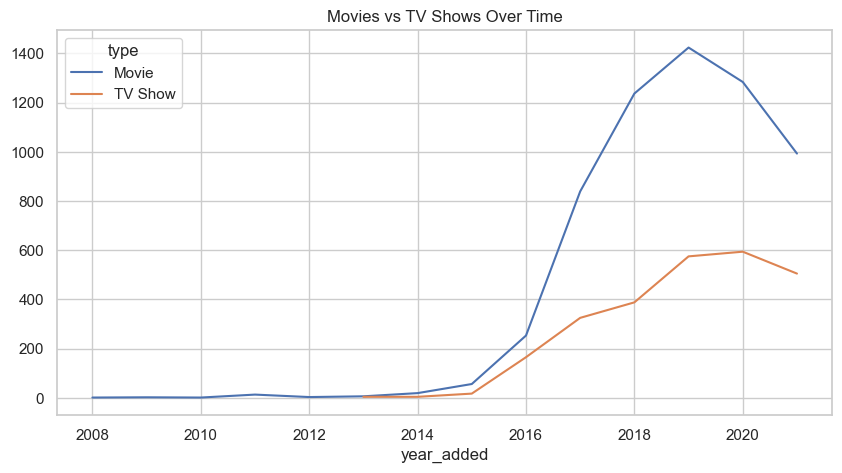

In [33]:
df.groupby(['year_added','type']).size().unstack().plot(figsize=(10,5))
plt.title("Movies vs TV Shows Over Time")
plt.show()


TOP 10 COUNTRIES

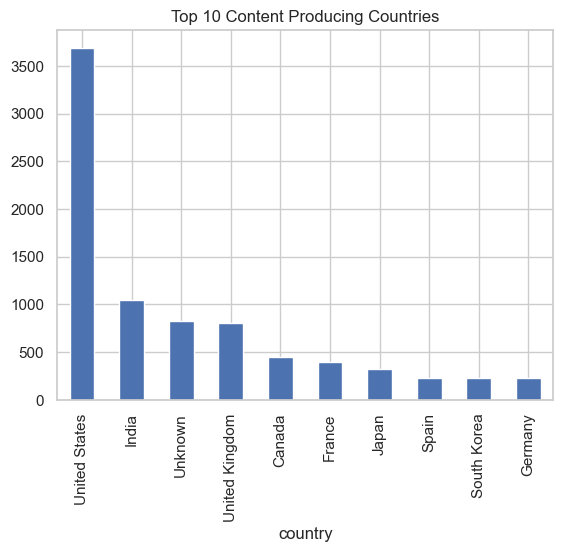

In [34]:
top_countries = df_country['country'].value_counts().head(10)

top_countries.plot(kind='bar')
plt.title("Top 10 Content Producing Countries")
plt.show()


RATINGS VS TYPE

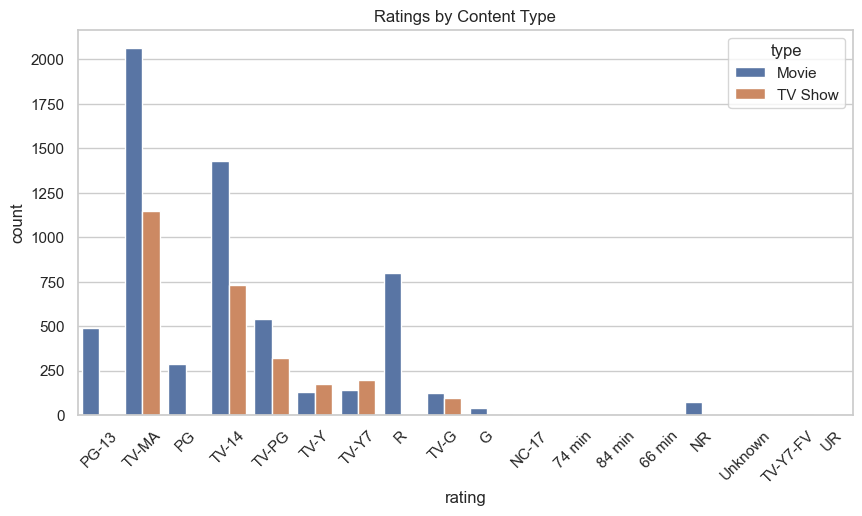

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating', hue='type')
plt.xticks(rotation=45)
plt.title("Ratings by Content Type")
plt.show()


Multivariate Analysis

GENRE POPULARITY

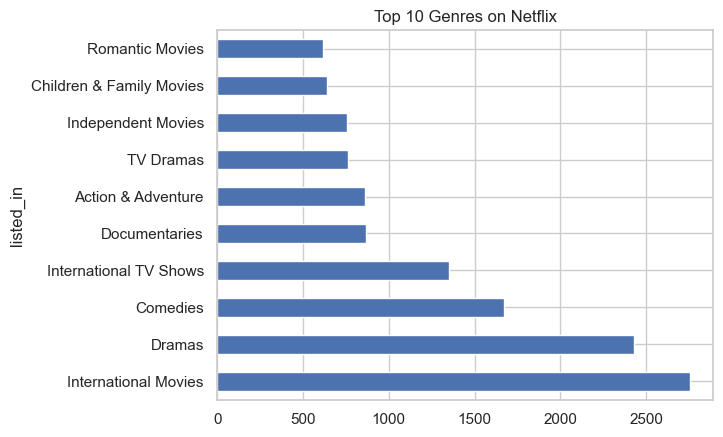

In [36]:
df_genre['listed_in'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Genres on Netflix")
plt.show()


GENRE VS TYPE

In [ ]:
top_genres = df_genre['listed_in'].value_counts().head(5).index

sns.countplot(
    data=df_genre[df_genre['listed_in'].isin(top_genres)],
    y='listed_in',
    hue='type'
)
plt.title("Top Genres by Content Type")
plt.show()


DURATION ANALYSIS

MOVIE LENGTH DISTRIBUTION

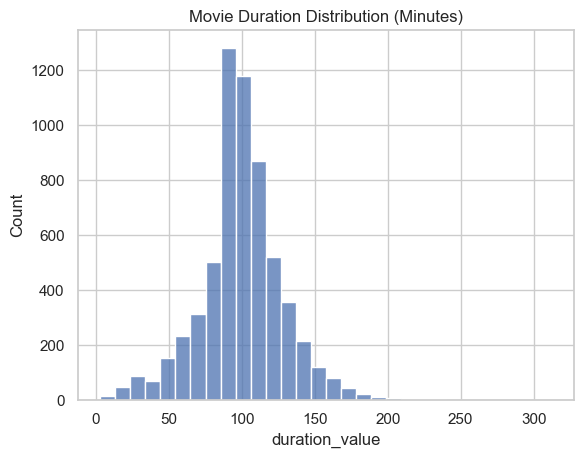

In [37]:
sns.histplot(
    df[df['type']=='Movie']['duration_value'],
    bins=30
)
plt.title("Movie Duration Distribution (Minutes)")
plt.show()


TV SHOWS SEASON

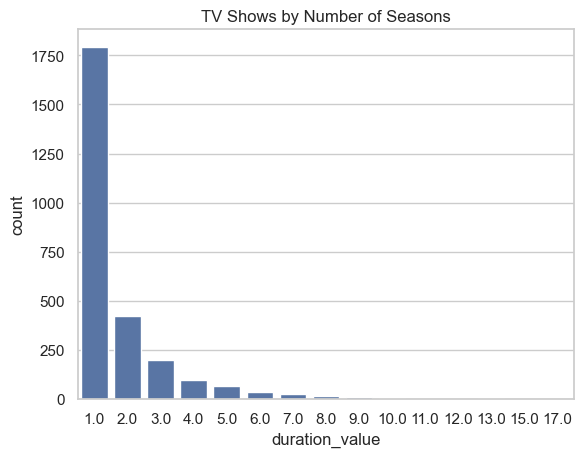

In [38]:
sns.countplot(
    x=df[df['type']=='TV Show']['duration_value']
)
plt.title("TV Shows by Number of Seasons")
plt.show()


Text-Based Insight

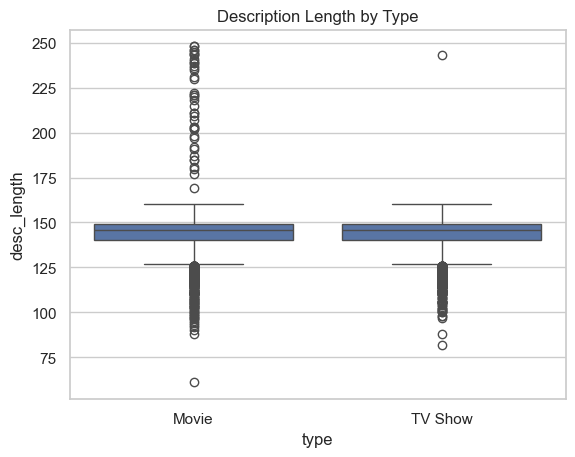

In [39]:
df['desc_length'] = df['description'].str.len()

sns.boxplot(data=df, x='type', y='desc_length')
plt.title("Description Length by Type")
plt.show()
